## 1. Load Data and Preprocess

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv(r"C:\Users\91859\Downloads\aluminum_data.csv")

# Define features (process parameters) and labels (target rod properties)
X = data[['chemical_composition', 'casting_temp', 'cooling_water_temp', 'casting_speed',
          'entry_temp_rolling_mill', 'emulsion_temp', 'emulsion_pressure',
          'emulsion_concentration', 'quench_water_pressure']]  # Example features
y = data[['UTS', 'elongation', 'conductivity']]  # Target outputs

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 2. Train Random Forest Model

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Random Forest - Mean Squared Error: {mse}')
print(f'Random Forest - R^2 Score: {r2}')


Random Forest - Mean Squared Error: 9.408328787965825
Random Forest - R^2 Score: 0.3282190555397455


## 3. Function for User Input and Prediction

In [3]:
def get_user_input():
    print("Please provide the following process parameters:")
    chemical_composition = float(input("Chemical Composition (0.1 to 1.0): "))
    casting_temp = float(input("Casting Temperature (600 to 700 °C): "))
    cooling_water_temp = float(input("Cooling Water Temperature (10 to 30 °C): "))
    casting_speed = float(input("Casting Speed (20 to 30 m/min): "))
    entry_temp_rolling_mill = float(input("Entry Temp at Rolling Mill (300 to 400 °C): "))
    emulsion_temp = float(input("Emulsion Temperature (50 to 80 °C): "))
    emulsion_pressure = float(input("Emulsion Pressure (3 to 6 bar): "))
    emulsion_concentration = float(input("Emulsion Concentration (0.5 to 2.0 %): "))
    quench_water_pressure = float(input("Quench Water Pressure (1 to 3 bar): "))

    # Create a dataframe from the input
    user_data = pd.DataFrame({
        'chemical_composition': [chemical_composition],
        'casting_temp': [casting_temp],
        'cooling_water_temp': [cooling_water_temp],
        'casting_speed': [casting_speed],
        'entry_temp_rolling_mill': [entry_temp_rolling_mill],
        'emulsion_temp': [emulsion_temp],
        'emulsion_pressure': [emulsion_pressure],
        'emulsion_concentration': [emulsion_concentration],
        'quench_water_pressure': [quench_water_pressure]
    })
    
    return user_data

def predict_user_input(model, user_data):
    # Scale the user input data
    user_data_scaled = scaler.transform(user_data)
    
    # Predict UTS, Elongation, and Conductivity
    predictions = model.predict(user_data_scaled)
    
    return predictions

def is_data_good(predictions, y_train):
    # Dynamically set thresholds based on training data statistics
    UTS_threshold = (y_train['UTS'].quantile(0.1), y_train['UTS'].quantile(0.9))
    elongation_threshold = (y_train['elongation'].quantile(0.1), y_train['elongation'].quantile(0.9))
    conductivity_threshold = (y_train['conductivity'].quantile(0.1), y_train['conductivity'].quantile(0.9))
    
    UTS_pred, elongation_pred, conductivity_pred = predictions[0]
    
    print(f"Predicted UTS: {UTS_pred}")
    print(f"Predicted Elongation: {elongation_pred}")
    print(f"Predicted Conductivity: {conductivity_pred}")
    
    # Check if predictions are within acceptable ranges
    if (UTS_threshold[0] <= UTS_pred <= UTS_threshold[1]) and \
       (elongation_threshold[0] <= elongation_pred <= elongation_threshold[1]) and \
       (conductivity_threshold[0] <= conductivity_pred <= conductivity_threshold[1]):
        print("The provided data is GOOD.")
    else:
        print("The provided data is NOT GOOD.")


## 4. Plot Predictions vs True Values

In [4]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test['UTS'].values, label="True UTS")
    plt.plot(y_pred[:, 0], label="Predicted UTS (Random Forest)")
    plt.title('True vs Predicted UTS')
    plt.legend()
    plt.show()


## 5. Main Execution Block

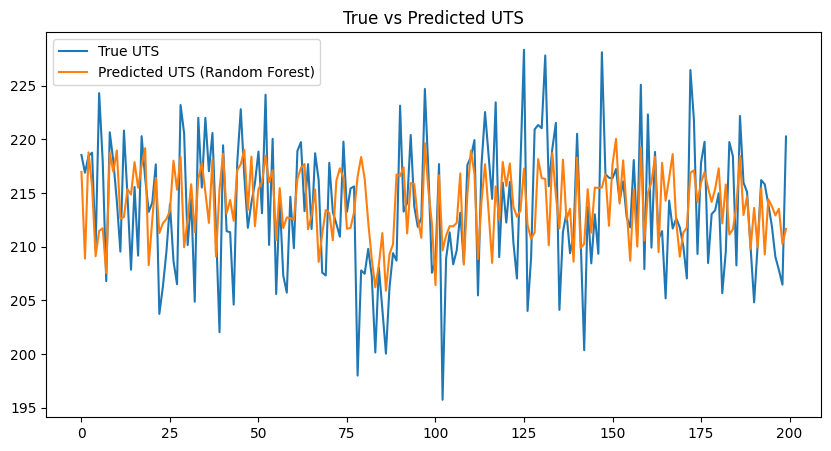

Please provide the following process parameters:


Chemical Composition (0.1 to 1.0):  0.71
Casting Temperature (600 to 700 °C):  631.9
Cooling Water Temperature (10 to 30 °C):  11.11
Casting Speed (20 to 30 m/min):  23.11
Entry Temp at Rolling Mill (300 to 400 °C):  398.7
Emulsion Temperature (50 to 80 °C):  78.1
Emulsion Pressure (3 to 6 bar):  3.2
Emulsion Concentration (0.5 to 2.0 %):  0.66
Quench Water Pressure (1 to 3 bar):  2.87


Predicted UTS: 210.64812929587336
Predicted Elongation: 9.5288436967402
Predicted Conductivity: 41.18298529645308
The provided data is GOOD.


In [5]:
if __name__ == "__main__":
    # Plot predictions from the test set
    plot_predictions(y_test, y_pred)
    
    # Get user input
    user_data = get_user_input()
    
    # Predict the user input data
    predictions = predict_user_input(model, user_data)
    
    # Check if the data is good
    is_data_good(predictions, y_train)
